In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression



In [2]:
#load dataset
loan_df=pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i (1) (1).csv")

In [3]:
# Ensure Loan_ID column is removed
loan_df.drop(columns=["Loan_ID"], errors='ignore', inplace=True)

In [4]:
#inspect the data
loan_df.info()
loan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#handle missing values
missing_values = loan_df.isnull().sum()
print(missing_values)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
#Handle missing values
loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])

# Now check if any missing values remain
print(loan_df.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [7]:
# Convert categorical variables to numeric
loan_df.replace({"Gender": {"Male": 1, "Female": 0},
                 "Married": {"Yes": 1, "No": 0},
                 "Education": {"Graduate": 1, "Not Graduate": 0},
                 "Self_Employed": {"Yes": 1, "No": 0},
                 "Property_Area": {"Urban": 2, "Semiurban": 1, "Rural": 0},
                 "Loan_Status": {"Y": 1, "N": 0}}, inplace=True)

# Ensure that 'Dependents' is explicitly converted to int
loan_df["Dependents"] = loan_df["Dependents"].replace("3+", 3).astype(int)


<ipython-input-7-1af62efdabe3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df.replace({"Gender": {"Male": 1, "Female": 0},


In [8]:
# Normalize numerical features
numerical_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
loan_df[numerical_cols] = (loan_df[numerical_cols] - loan_df[numerical_cols].mean()) / loan_df[numerical_cols].std()


In [ ]:
print("Mode:")
print(loan_df.mode().iloc[0])

Mode:
Gender               1.000000
Married              1.000000
Dependents           0.000000
Education            1.000000
Self_Employed        0.000000
ApplicantIncome     -0.475272
CoapplicantIncome   -0.554036
LoanAmount          -0.211069
Loan_Amount_Term     0.273009
Credit_History       1.000000
Property_Area        1.000000
Loan_Status          1.000000
Name: 0, dtype: float64


In [9]:
#check duplicates
print(loan_df.duplicated().sum())

0


In [10]:
#check datatypes
print(loan_df.dtypes)

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


In [11]:
#Unique element
unique = loan_df. nunique()
print("Unique values Count:\n", unique)


Unique values Count:
 Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


In [12]:
num_columns=loan_df.select_dtypes(include=['float64','int64']).columns
num_columns=[col for col in num_columns if col.lower() != 'loan_id']
print(num_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [13]:
sns.set(style="darkgrid")

In [14]:
num_cols=len(num_columns)
num_rows=(num_cols//3)+(num_cols%3>0)

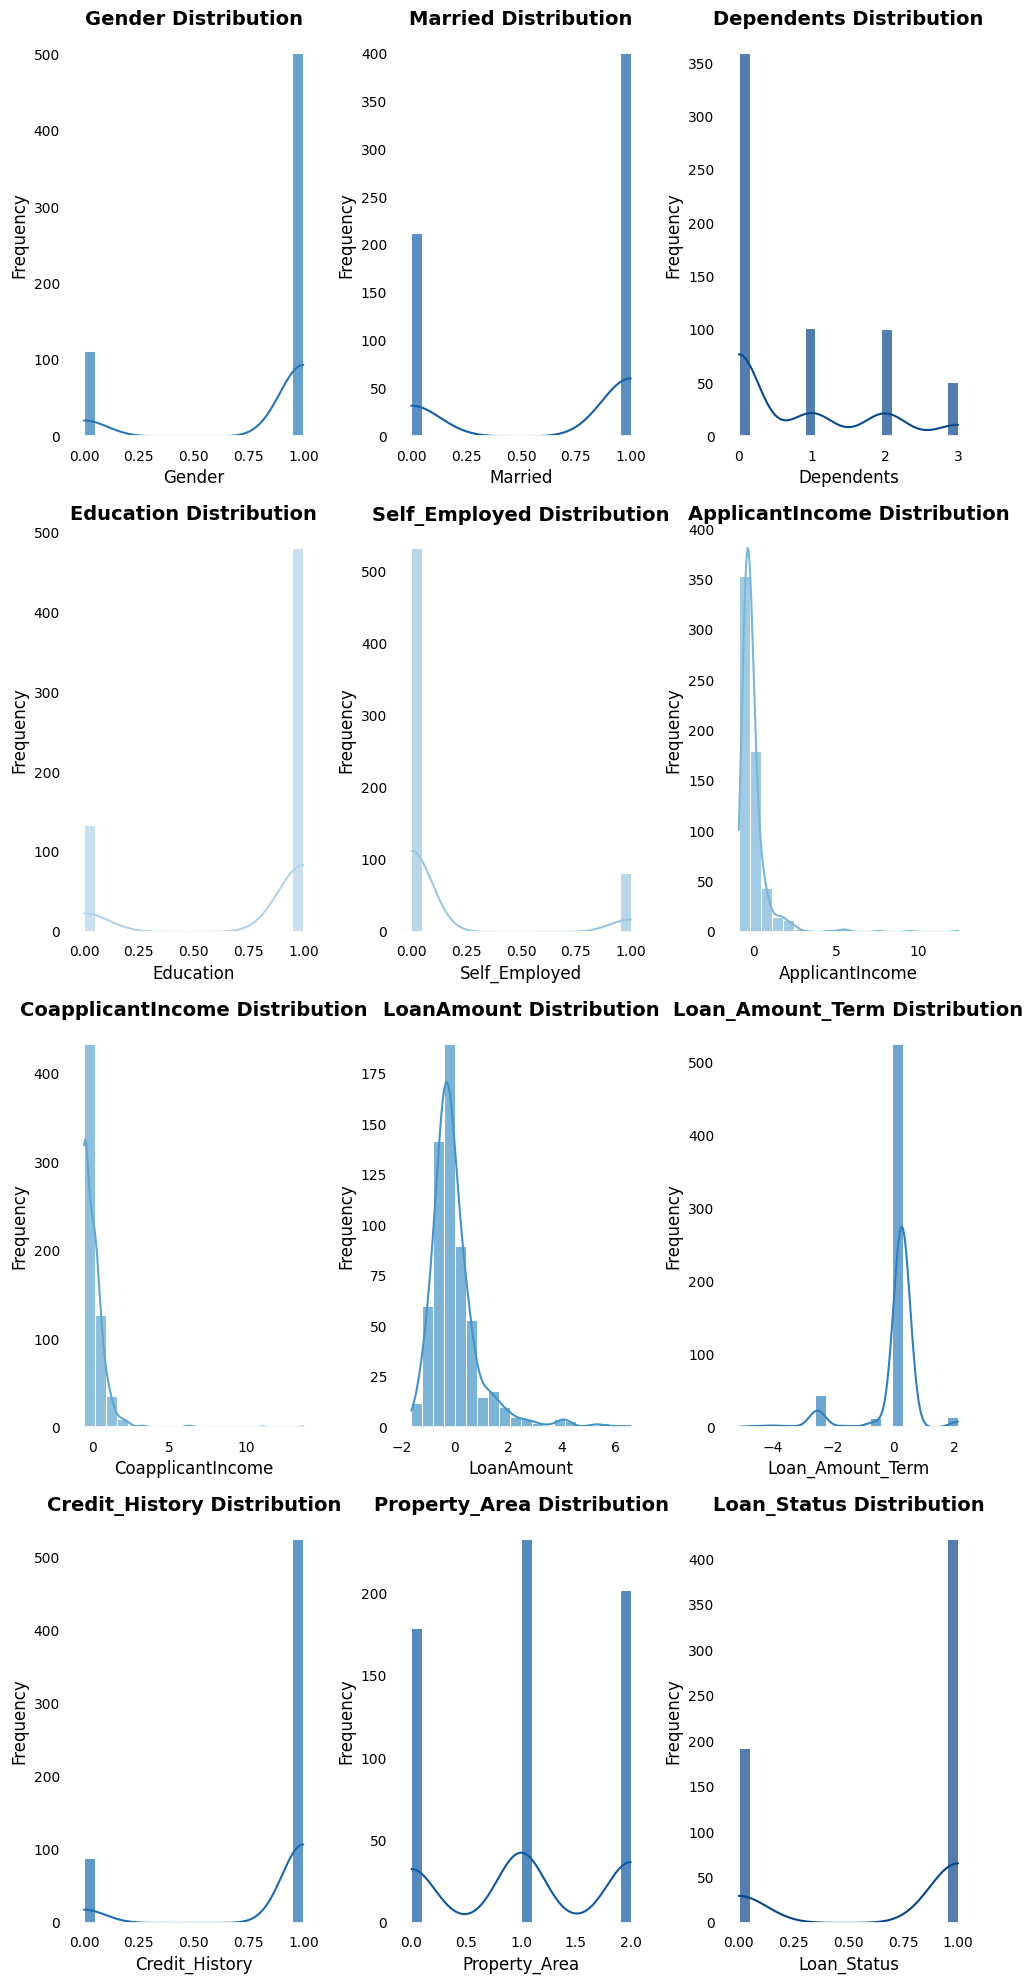

In [15]:
#Data Visualization
#Histogram
# Ensure loan_df is the correct dataframe and num_columns is derived
num_columns = loan_df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(num_columns)  # Define num_cols based on the number of numeric columns

# Define number of rows for subplots based on num_cols
num_rows = (num_cols + 2) // 3  # Ensures that there are enough rows for all the columns

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 5 * num_rows))
axes = axes.flatten()

# Create color palette
colors = sns.color_palette('Blues', num_cols)
dark_colors = sns.color_palette("Blues", 10)[7:10]
colors[:3] = dark_colors

# Plot each numeric column
for i, col in enumerate(num_columns):
    sns.histplot(loan_df[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('white')

# Remove extra subplots if necessary
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


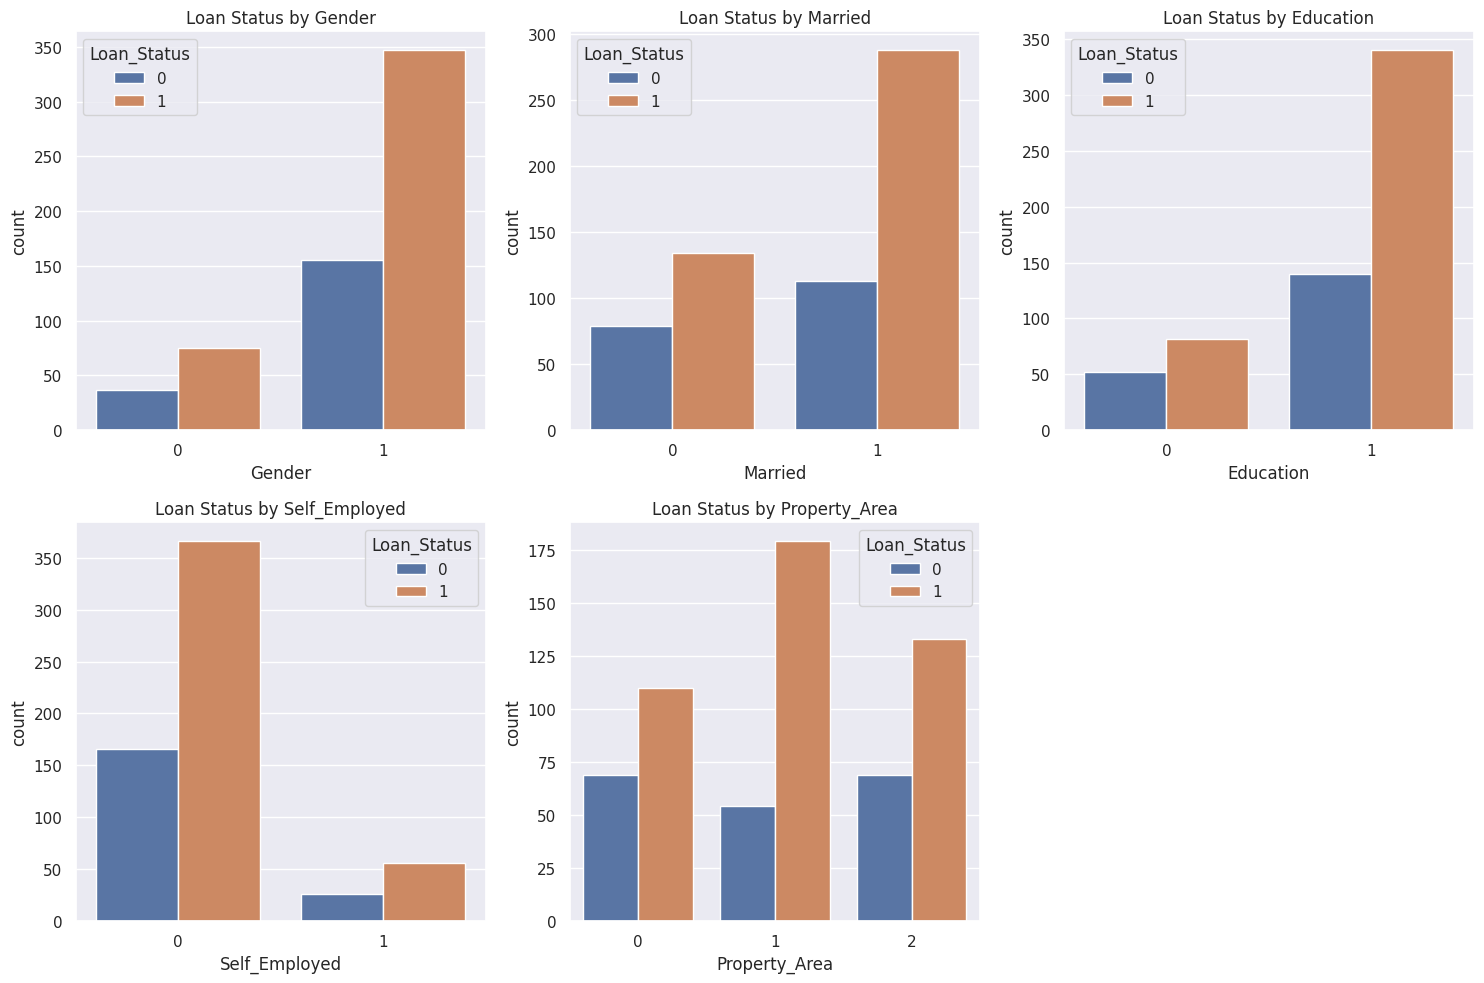

In [16]:
#Barplot
# List of categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Define number of rows and columns for subplots
num_cols = 3  # Columns in subplot grid
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Dynamically calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten for easier iteration

# Plot countplots
for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue="Loan_Status", data=loan_df, ax=axes[idx])
    axes[idx].set_title(f'Loan Status by {col}')

# Remove any unused subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])  # Deletes the extra subplot

plt.tight_layout()
plt.show()



Outliers detected:
Gender


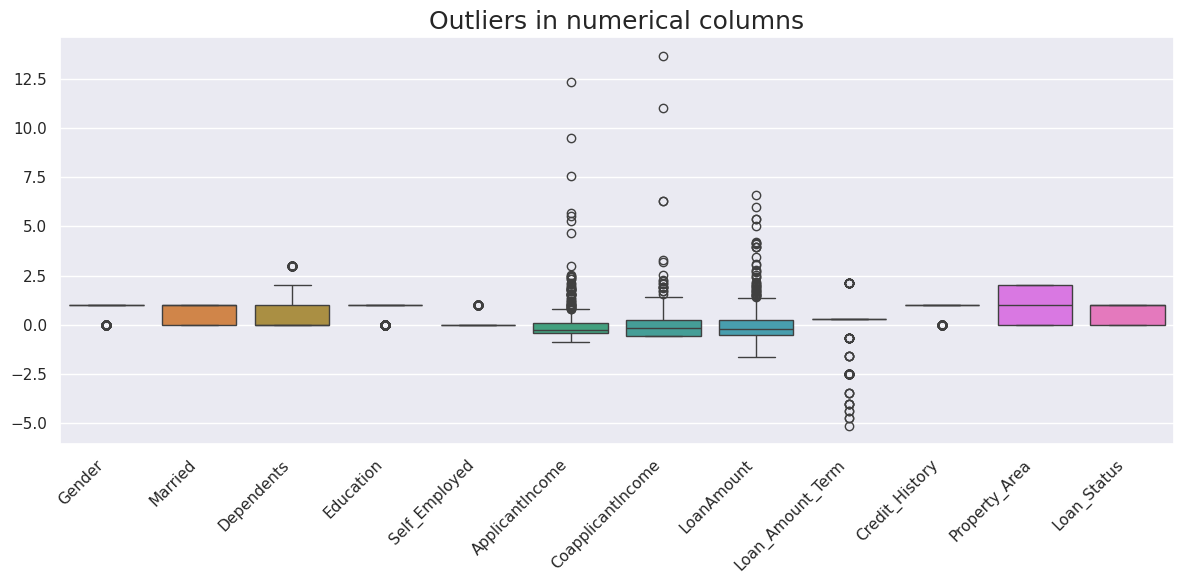

In [17]:
# Data Visualization
#Box plot
num_columns = loan_df.select_dtypes(include=['float64', 'int64']).columns
num_columns = [col for col in num_columns if col.lower() != 'id']

def outliers(df, num_columns):
  outliers = {}
  for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
num_outliers = outliers(loan_df, num_columns)
print(f"Outliers detected:")
for col, outliers_df in num_outliers.items():
  print(col)

plt.figure(figsize=(12,6))
sns.boxplot(data = loan_df[num_columns])
plt.title("Outliers in numerical columns", fontsize = 18)
plt.xticks(rotation = 45, ha="right")
plt.tight_layout()
plt.show()

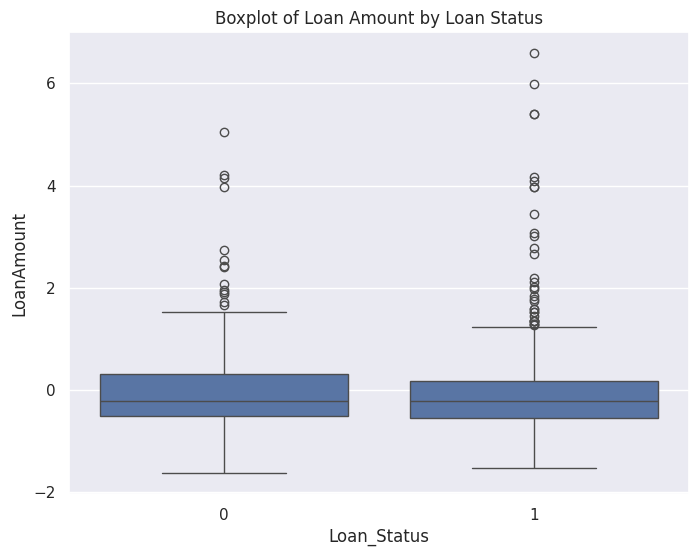

In [18]:
# Boxplot for Loan Amount grouped by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x="Loan_Status", y="LoanAmount", data=loan_df)
plt.title("Boxplot of Loan Amount by Loan Status")
plt.show()


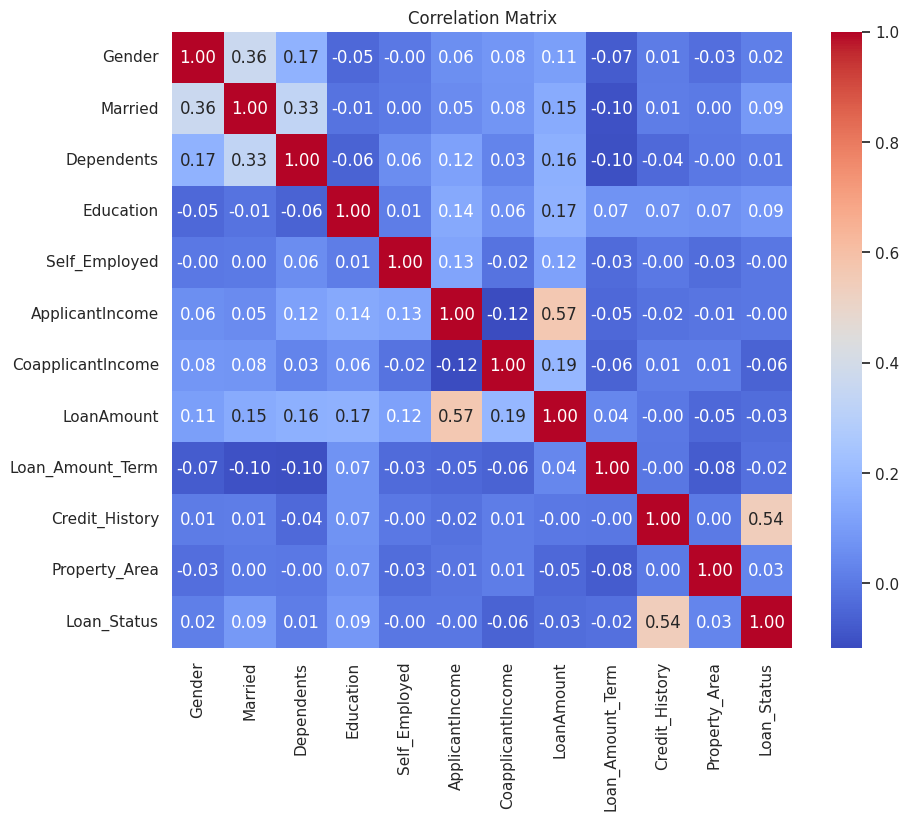

In [19]:
#Heatmap
num_data= loan_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

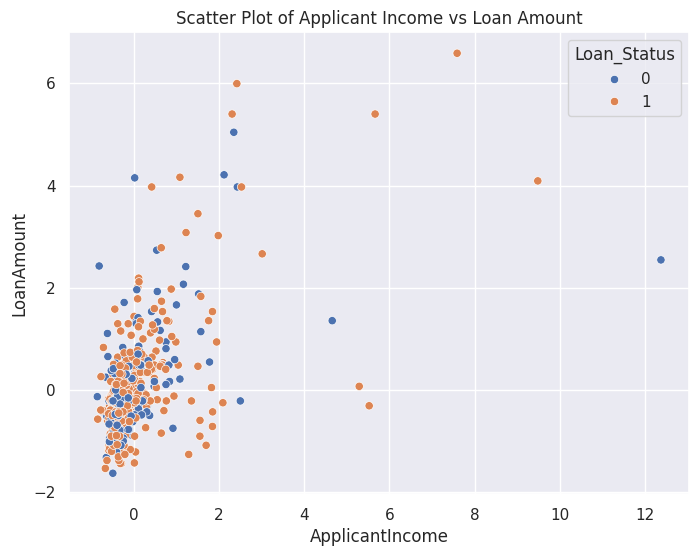

In [20]:
#Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=loan_df['ApplicantIncome'], y=loan_df['LoanAmount'], hue=loan_df['Loan_Status'])
plt.title("Scatter Plot of Applicant Income vs Loan Amount")
plt.show()

In [21]:
# Split features and target
X = loan_df.drop(columns=["Loan_Status"]).values
y = loan_df["Loan_Status"].values.reshape(-1, 1)
X = np.c_[np.ones(X.shape[0]), X]  # Add bias term

In [22]:
# Logistic Regression from Scratch
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient descent algorithm
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return weights, cost_history

In [23]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize weights
weights = np.zeros((X_train.shape[1], 1))
learning_rate = 0.01
iterations = 1000

# Train the model
trained_weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Prediction function
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.5).astype(int)
# Evaluate model
y_train_pred = predict(X_train, trained_weights)
y_test_pred = predict(X_test, trained_weights)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")



Iteration 0: Cost = 0.6907
Iteration 100: Cost = 0.5993
Iteration 200: Cost = 0.5849
Iteration 300: Cost = 0.5778
Iteration 400: Cost = 0.5722
Iteration 500: Cost = 0.5671
Iteration 600: Cost = 0.5626
Iteration 700: Cost = 0.5583
Iteration 800: Cost = 0.5544
Iteration 900: Cost = 0.5508

Train Set Evaluation:
Accuracy: 0.70
Precision: 0.70
Recall: 1.00
F1 Score: 0.82


Test Set Evaluation:
Accuracy: 0.64
Precision: 0.65
Recall: 0.99
F1 Score: 0.78



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel

In [26]:
 #Decision Tree Model no:1
dt_model = DecisionTreeClassifier(random_state = 42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.7073
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        43
           1       0.77      0.79      0.78        80

    accuracy                           0.71       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.70      0.71      0.71       123



In [27]:
#Random Forest Model no:2
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train.ravel())
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.7805
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [28]:
# Model Comparison Output

 #Decision Tree Model 1
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Random Forest Model 2
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Evaluate which model performs better based on Accuracy and F1-Score
# Can also compare precision and recall if needed.
if accuracy_dt > accuracy_rf:
  print("Decision Tree performed better based on accuracy.")
else:
  print("Random Forest performed better based on accuracy.")

Decision Tree Accuracy: 0.7073
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        43
           1       0.77      0.79      0.78        80

    accuracy                           0.71       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.70      0.71      0.71       123

Random Forest Classifier Accuracy: 0.7805
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Random Forest performed better based on accuracy.


In [29]:
 #Decision Tree Hyperparameter Tuning Model no: 1

# Defining the hyperparameters to tune for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perom GridSearch with Cross-Validation for Decision Tree
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy', n_jobs=1)
grid_search_dt.fit(X_train, y_train)

# Best Hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Cross-Validation Score for Decision Tree with best parameters
dt_cv_scores = cross_val_score(grid_search_dt.best_estimator_, X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean():.4f}")

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Cross-Validation Accuracy: 0.7597


In [30]:
#Random Forest Hyperparameter Tuning Model no: 2

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [10],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=1)
grid_search_rf.fit(X_train, y_train.ravel())  # <-- Fix applied here

# Best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Cross-Validation Score
rf_cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train.ravel(), cv=5)  # <-- Fix applied here
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest Cross-Validation Accuracy: 0.7982


In [31]:
#Feature Selection for decision tree
# Remove constant features before feature selection
constant_mask = (X_train.var(axis=0) == 0)  # Identify constant features
X_train_filtered = X_train[:, ~constant_mask]  # Remove constant features
X_test_filtered = X_test[:, ~constant_mask]

# Selecting the best 5 features
select_k_best_dt = SelectKBest(f_classif, k=5)
X_train_selected_dt = select_k_best_dt.fit_transform(X_train_filtered, y_train.ravel())  # Fix applied
X_test_selected_dt = select_k_best_dt.transform(X_test_filtered)

# Printing selected features and scores
print("Selected Features for Decision Tree:")
selected_feature_dt = select_k_best_dt.get_support(indices=True)
print("Feature indices:", selected_feature_dt)
print("Feature scores:", select_k_best_dt.scores_)

# Training the Decision Tree model on the selected Features
dt_selected = DecisionTreeClassifier(random_state=42)
dt_selected.fit(X_train_selected_dt, y_train.ravel())  # Fix applied

# Evaluating the model on the test set
y_pred_selected_dt = dt_selected.predict(X_test_selected_dt)
accuracy_selected_dt = accuracy_score(y_test, y_pred_selected_dt)

print(f"Decision Tree Accuracy with Selected Features: {accuracy_selected_dt:.4f}")


Selected Features for Decision Tree:
Feature indices: [1 3 6 7 9]
Feature scores: [3.78347432e-02 5.71747263e+00 5.51723324e-01 1.95672495e+00
 8.97509399e-03 2.13984192e-01 2.12710968e+00 7.55854735e-01
 4.32066134e-02 2.03137601e+02 1.88762411e-01]
Decision Tree Accuracy with Selected Features: 0.7154


In [32]:
# Feature Selection for Random Forest
# Fit a Random Forest model to evaluate feature importance
rf_model.fit(X_train, y_train.ravel())  # Fix applied

# Get feature importances and select top 5 manually
importances = rf_model.feature_importances_
top_k_indices = np.argsort(importances)[-5:]  # Get indices of top 5 features

# Select those features
X_train_selected_rf = X_train[:, top_k_indices]
X_test_selected_rf = X_test[:, top_k_indices]

# Print selected feature indices
print("Selected Features for Random Forest:")
print("Feature indices:", top_k_indices)

# Train a Random Forest model on the selected Features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected_rf, y_train.ravel())  # Fix applied

# Evaluate the model on the test set
y_pred_selected_rf = rf_selected.predict(X_test_selected_rf)
accuracy_selected_rf = accuracy_score(y_test, y_pred_selected_rf)

print(f"Random Forest Accuracy with Selected Features: {accuracy_selected_rf:.4f}")


Selected Features for Random Forest:
Feature indices: [11  7  8  6 10]
Random Forest Accuracy with Selected Features: 0.7642


In [33]:
# Final Model For Random Forest
# Using best hyperparameters from GridSearchCV
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 10
}

# Train Random Forest with Best Hyperparameters
rf_final = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Feature Selection using SelectFromModel
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=3)
rf_selector.fit(X_train, y_train.ravel())  # Convert y_train to 1D

# Get selected feature indices
selected_feature_indices = rf_selector.get_support(indices=True)
X_train_selected_rf = X_train[:, selected_feature_indices]  # Use NumPy indexing
X_test_selected_rf = X_test[:, selected_feature_indices]  # Use NumPy indexing

# Fit the final Random Forest model
rf_final.fit(X_train_selected_rf, y_train.ravel())  # Convert y_train to 1D

# Make predictions on the test data
y_pred_rf_final = rf_final.predict(X_test_selected_rf)

# Calculate performance metrics
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_final)
precision_rf_final = precision_score(y_test, y_pred_rf_final, average='weighted')
recall_rf_final = recall_score(y_test, y_pred_rf_final, average='weighted')
f1_rf_final = f1_score(y_test, y_pred_rf_final, average='weighted')

# Print results
print(f"Final Random Forest Accuracy: {accuracy_rf_final:.4f}")
print(f"Final Random Forest Precision: {precision_rf_final:.4f}")
print(f"Final Random Forest Recall: {recall_rf_final:.4f}")
print(f"Final Random Forest F1 Score: {f1_rf_final:.4f}")


Final Random Forest Accuracy: 0.7886
Final Random Forest Precision: 0.8048
Final Random Forest Recall: 0.7886
Final Random Forest F1 Score: 0.7683


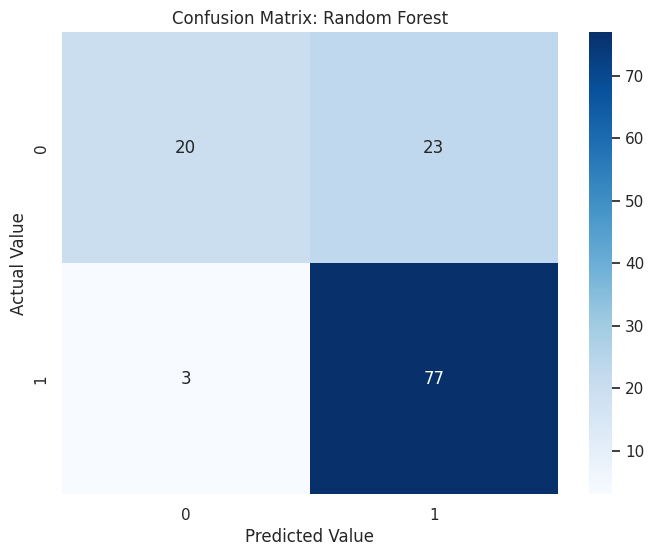

In [34]:
# CONFUSION MATRIX

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred_rf_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_final.classes_, yticklabels=rf_final.classes_)
plt.title("Confusion Matrix: Random Forest")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()